In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('scalapay_postalcode.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [125]:
df.head(1).T

,0
order_token,1615KZI86SI0
user_token,736842KMCTME95
country_code,IT
dialing_prefix,39
number_complete_orders,3
order_created_at,2022-02-11 09:46:48+00:00
order_amount,59.13
funding,prepaid
merchant_id,1557
total_default_pre_collections,0.0


In [4]:
from personalpipeline.src.preprocessing import eda

eda = eda.Eda()

In [5]:
eda.missing_values_table(df)

Your selected dataframe has 30 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,4634,4.6
postcode_mapped,4455,4.4
timezone_id,3050,3.0
timezone_current_hour,3050,3.0
current_time_tz,3050,3.0
is_daylight_saving,3050,3.0
city,2443,2.4
currency_code,2427,2.4
is_crawler,2426,2.4
threat_level,2426,2.4


In [6]:
# Data preprocessing 
df['order_created_at' ] =pd.to_datetime(df['order_created_at'])
df['current_time_tz'] = pd.to_datetime(df['current_time_tz'],utc=True )
df["order_created_at"] = df["order_created_at"].dt.tz_localize('UTC')
df['merchant_id'] = df.merchant_id.astype('object')
df['postcode_mapped'] = df['postcode_mapped'].apply(lambda x: str(x).replace(".", "").rstrip("0"))
df['dialing_prefix'] = df.dialing_prefix.astype('object')

In [7]:
print("dataset -  rows:",df.shape[0]," columns:", df.shape[1])

dataset -  rows: 100746  columns: 30


In [8]:
# Target creation

df['fraud_loss_target'] = (df.total_default_pre_collections >0) & (df.total_collections_win == 0)
df['credit_loss_target'] = (df.total_default_pre_collections > 0) & (df.fraud_loss_target == False)

In [9]:
eda.missing_values_table(df)

Your selected dataframe has 32 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,4634,4.6
timezone_id,3050,3.0
timezone_current_hour,3050,3.0
current_time_tz,3050,3.0
is_daylight_saving,3050,3.0
city,2443,2.4
currency_code,2427,2.4
is_crawler,2426,2.4
threat_level,2426,2.4
is_eu,2426,2.4


In [10]:
def reduced_percentage(total, part):
    return (print('Reduced percentage represented',100 - (part/total)*100))

In [11]:
eda.missing_values_table(df.query("current_time_tz.notnull()"))

Your selected dataframe has 32 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,4007,4.1
city,16,0.0
funding,13,0.0
user_age,5,0.0
deviceid,2,0.0
currency_code,1,0.0


In [12]:
# The reason I dropped all missing values was:
# Inconssitencies between order_creat_at and current_time. There are orders from 2019-02-20 to 2020-03-23
# that dont have values mapped with the following variables:
print(df.query("current_time_tz.notnull()").current_time_tz.min())
eda.missing_values_table(df.query("current_time_tz.isnull()"))

2020-03-23 13:08:47+00:00
Your selected dataframe has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
timezone_id,3050,100.0
timezone_current_hour,3050,100.0
current_time_tz,3050,100.0
is_daylight_saving,3050,100.0
city,2427,79.6
currency_code,2426,79.5
is_eu,2426,79.5
location_language,2426,79.5
location_capital,2426,79.5
is_tor,2426,79.5


In [13]:
#Leaving only with:
df_v1 = df.query("current_time_tz.notnull()")
eda.missing_values_table(df_v1)

# This missingness with these remaining variables seemed to be related with transactions that didn't went through
# I will not drop them because a good percentage of them have good historical information about the user. Many of them are Fraud
# Seems thi highest is shipping country it only represents 4% of the entire dataset. Therefore I'm usisng tecniques of imputation such as most_frequent


Your selected dataframe has 32 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,4007,4.1
city,16,0.0
funding,13,0.0
user_age,5,0.0
deviceid,2,0.0
currency_code,1,0.0


In [14]:
print("Dataset without some missing values  -  rows:",df_v1.shape[0]," columns:", df_v1.shape[1])
reduced_percentage(df.shape[0], df_v1.shape[0])

Dataset without some missing values  -  rows: 97696  columns: 32
Reduced percentage represented 3.0274154805153586


In [15]:
df_v2 = df_v1.drop(df_v1.query('total_collections_win != 0  and total_default_pre_collections != 0 and user_tenure_days == 0').index)
print("Dataset without Tunure cero anomaly -  rows:",df_v2.shape[0]," columns:", df_v2.shape[1])
reduced_percentage(df_v1.shape[0], df_v2.shape[0])

Dataset without Tunure cero anomaly -  rows: 93436  columns: 32
Reduced percentage represented 4.360465116279073


In [16]:
#df_credit.drop_duplicates(subset='order_token', keep='first')
# handiling Duplication
print('Duplicated orders [primary key]:',df_v2[df_v2['order_token'].duplicated()].shape)
print('Total duplicated observations:',df_v2[df_v2.duplicated()].shape)
# Compute total duplicated orders 
total_duplicated_orders = df_v2[df_v2['order_token'].duplicated(keep=False)]
# Compute differences  
differences = total_duplicated_orders.groupby('order_token').apply(lambda x: x.ne(x.iloc[0]).sum())

Duplicated orders [primary key]: (734, 32)
Total duplicated observations: (80, 32)


In [17]:
# Remove cero differences
differences = differences.loc[:, (differences != 0).any(axis=0)]
differences.sum().T

shipping_country          53
city                      79
timezone_id                4
timezone_current_hour    152
current_time_tz          662
deviceid                  69
dtype: int64

In [18]:
differences.sort_values(by = 'current_time_tz', ascending=False)
#df_v2.query("order_token == '01A9KDYCB48R'").T
differences.query("current_time_tz == 0 and city != 0 and timezone_id != 0 and deviceid != 0 and shipping_country !=0")
# We conclude that current_time_tz is present in all duplicated orders and no order presents duplication in the remaining variables without the presence of current_time_tz 
# Reason why we remove duplicated orders is:
# order_token is the primary key
# We conclude that this duplication represents the placements of orders and data collection systems


,shipping_country,city,timezone_id,timezone_current_hour,current_time_tz,deviceid
order_token,,,,,,


In [19]:
#Removing duplicates keeping the first order
df_v3 = df_v2.drop_duplicates(subset='order_token', keep='first')
print("Removed duplicates by order_token keeping the first -  rows:",df_v3.shape[0]," columns:", df_v3.shape[1])
reduced_percentage(df_v2.shape[0], df_v3.shape[0])

Removed duplicates by order_token keeping the first -  rows: 92702  columns: 32
Reduced percentage represented 0.7855644505329877


In [20]:
# With this we can separate our datasets for credit_loss and fraud_loss
df_credit = df_v3.query("fraud_loss_target == 0")
df_fraud = df_v3.copy()
print("Final dataset for credit_loss -  rows:",df_credit.shape[0]," columns:", df_credit.shape[1])
reduced_percentage(df_v3.shape[0], df_credit.shape[0])
print("Final dataset for fraud_loss -  rows:",df_fraud.shape[0]," columns:", df_fraud.shape[1])
reduced_percentage(df_v3.shape[0], df_fraud.shape[0])

Final dataset for credit_loss -  rows: 80120  columns: 32
Reduced percentage represented 13.572522707169213
Final dataset for fraud_loss -  rows: 92702  columns: 32
Reduced percentage represented 0.0


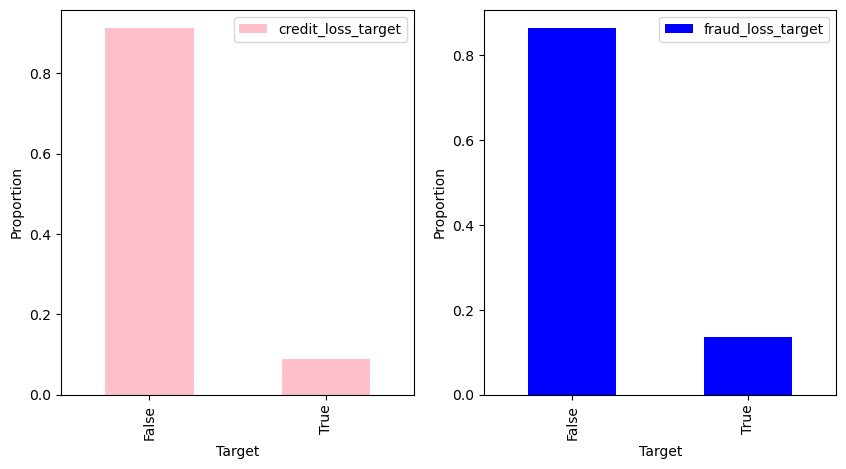

In [21]:
import matplotlib.pyplot as plt
# Get the proportions of each target variable
credit_proportions = df_credit['credit_loss_target'].value_counts(normalize=True)
fraud_proportions = df_fraud['fraud_loss_target'].value_counts(normalize=True)

# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
credit_proportions.plot(kind='bar', ax=ax1, color='pink', label='credit_loss_target')
fraud_proportions.plot(kind='bar', ax=ax2, color='blue', label='fraud_loss_target')

# Add a legend and labels to each chart
ax1.legend()
ax1.set_xlabel('Target')
ax1.set_ylabel('Proportion')
ax2.legend()
ax2.set_xlabel('Target')
ax2.set_ylabel('Proportion')

# Show the plot
plt.show()


In [22]:
# Get the sample size and percentage of sample size for each dataframe
credit_sample_size = df_credit.shape[0]
credit_sample_percentage = credit_sample_size / df.shape[0] * 100
fraud_sample_size = df_fraud.shape[0]
fraud_sample_percentage = fraud_sample_size / df.shape[0] * 100

# Print the sample size and percentage of sample size for each dataframe
print(f'Sample size for df_credit: {credit_sample_size} ({credit_sample_percentage:.2f}%)')
print(f'Sample size for df_fraud: {fraud_sample_size} ({fraud_sample_percentage:.2f}%)')
print('credit proportions',credit_proportions * 100)
print('fraud_proportions',fraud_proportions * 100)

Sample size for df_credit: 80120 (79.53%)
Sample size for df_fraud: 92702 (92.02%)
credit proportions False    91.159511
True      8.840489
Name: credit_loss_target, dtype: float64
fraud_proportions False    86.427477
True     13.572523
Name: fraud_loss_target, dtype: float64


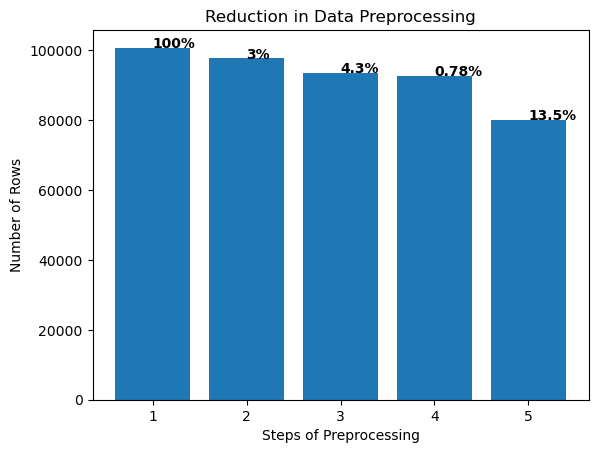

In [23]:
# Create a list of the percentages for each step of the preprocessing
percentages = [100,3, 4.3, 0.78, 13.5]

# Create a bar plot with the number of rows for each step of the preprocessing
plt.bar([1, 2, 3, 4, 5], [df.shape[0], df_v1.shape[0], df_v2.shape[0],df_fraud.shape[0], df_credit.shape[0]])

# Add the percentage labels to the corresponding bars
for i, v in enumerate([df.shape[0], df_v1.shape[0], df_v2.shape[0] ,df_fraud.shape[0], df_credit.shape[0]]):
    plt.text(i + 1, v + 0.05, str(percentages[i]) + "%", color='black', fontweight='bold')

# Add axis labels and a title
plt.xlabel('Steps of Preprocessing')
plt.ylabel('Number of Rows')
plt.title('Reduction in Data Preprocessing')

# Show the plot
plt.show()

In [24]:
# Exploratory data analysis reduced
# working datasets


# Drop non nooisy deatures like is_proxy, is_tor, is_crawler beacuase they dont have true values
# Drop total_default_pre_collections and total_collections_win to avoid data leake
# Drop targets non corresponden to its dataset
# dialing prefix becasue it returns repeated information
#location_postal_code becuase I dont trust the ouput
#timezone_id becuase it was high % of missing values and gives repeated info

# I will drop order token later

#df_credit = df.copy()
df_credit_v1 = df_credit.drop(columns=['is_tor','is_proxy','is_crawler','threat_level',
'total_default_pre_collections', 'total_collections_win', 'dialing_prefix', 'timezone_id','location_postal_code', 'fraud_loss_target' ])
df_fraud_v1 = df_fraud.drop(columns=['is_tor','is_proxy','is_crawler','threat_level',
'total_default_pre_collections', 'total_collections_win', 'dialing_prefix', 'timezone_id','location_postal_code', 'credit_loss_target' ])

print(df_credit_v1.shape)
print(df_fraud_v1.shape)


(80120, 22)
(92702, 22)


In [25]:
# Imputing missing values 
eda.missing_values_table(df_credit_v1)

Your selected dataframe has 22 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,3370,4.2
city,13,0.0
funding,9,0.0
user_age,1,0.0
currency_code,1,0.0
deviceid,1,0.0


In [26]:
eda.missing_values_table(df_fraud_v1)

Your selected dataframe has 22 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
shipping_country,3887,4.2
city,16,0.0
funding,13,0.0
user_age,5,0.0
currency_code,1,0.0
deviceid,1,0.0


In [27]:
#Imputing missing values 
from sklearn.impute import SimpleImputer

def impute_categorical(df):
    categorical_vars = df.select_dtypes(include='object')
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(categorical_vars)
    df[categorical_vars.columns] = imputer.transform(categorical_vars)
    return df



df_credit_v2 = impute_categorical(df_credit_v1)
df_fraud_v2 = impute_categorical(df_fraud_v1)



In [28]:
# sanity check 
print(df_credit_v2.shape)
print(df_fraud_v2.shape)


(80120, 22)
(92702, 22)


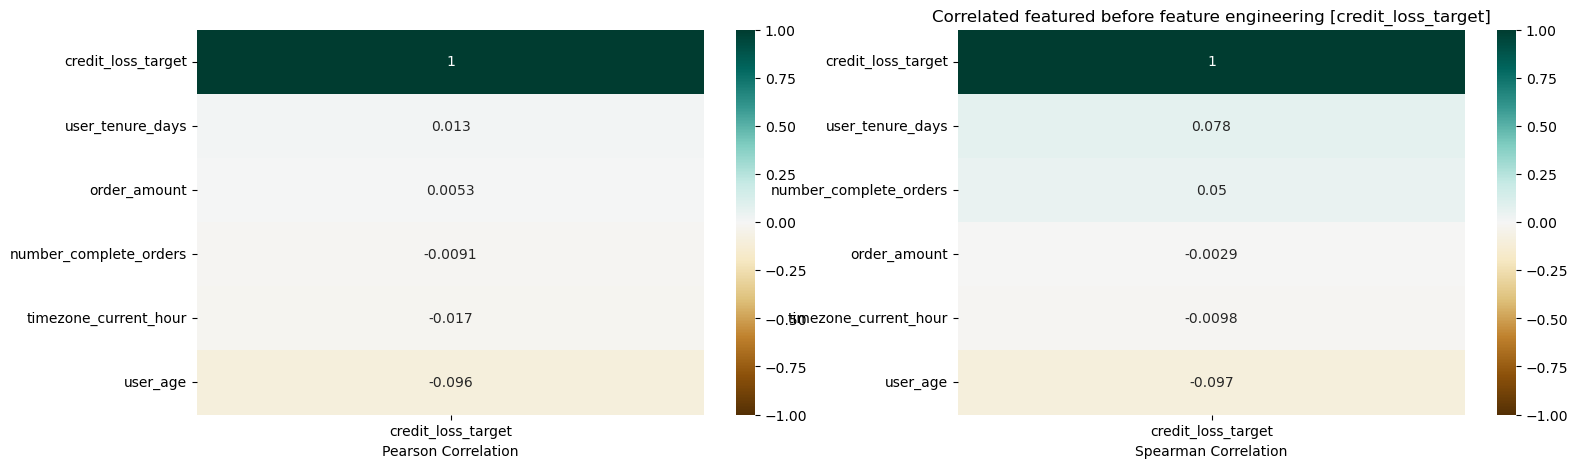

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.heatmap(df_credit_v2.corr(numeric_only=True)[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)


sns.heatmap(df_credit_v2.corr(numeric_only=True, method='spearman')[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)



ax1.set_xlabel('Pearson Correlation')

ax2.set_xlabel('Spearman Correlation')

plt.title('Correlated featured before feature engineering [credit_loss_target]', loc='center', )
plt.show()

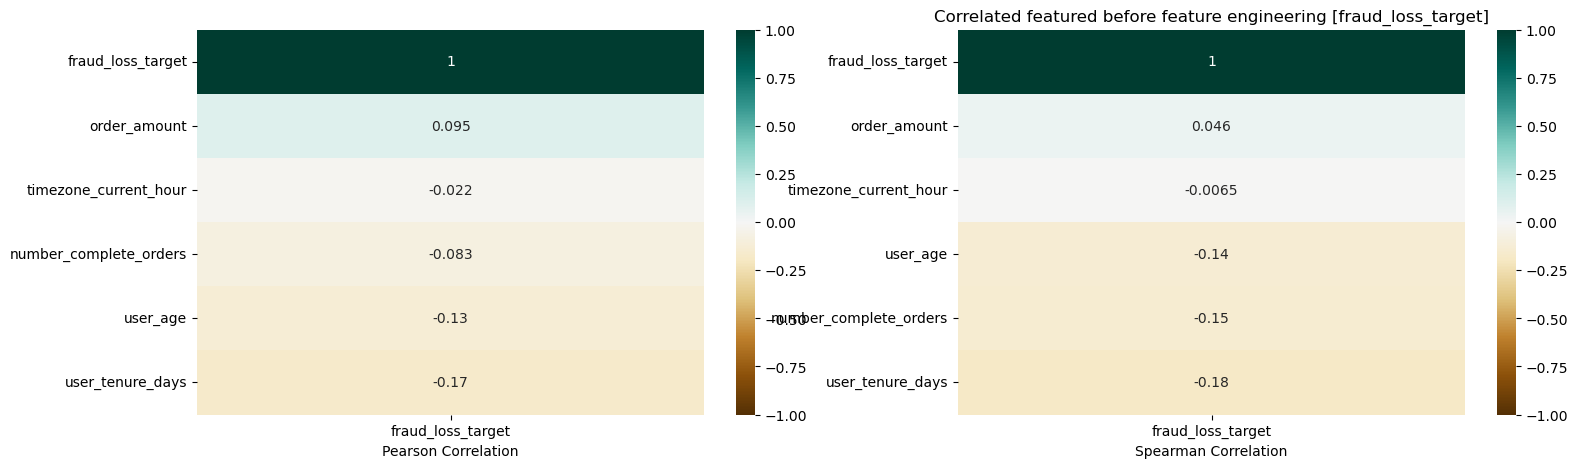

In [30]:
# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

sns.heatmap(df_fraud_v2.corr(numeric_only=True)[['fraud_loss_target']].sort_values(by='fraud_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)

sns.heatmap(df_fraud_v2.corr(numeric_only=True, method='spearman')[['fraud_loss_target']].sort_values(by='fraud_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)

ax1.set_xlabel('Pearson Correlation')

ax2.set_xlabel('Spearman Correlation')

plt.title('Correlated featured before feature engineering [fraud_loss_target]', loc='center', )
plt.show()

<AxesSubplot: xlabel='order_amount', ylabel='Density'>

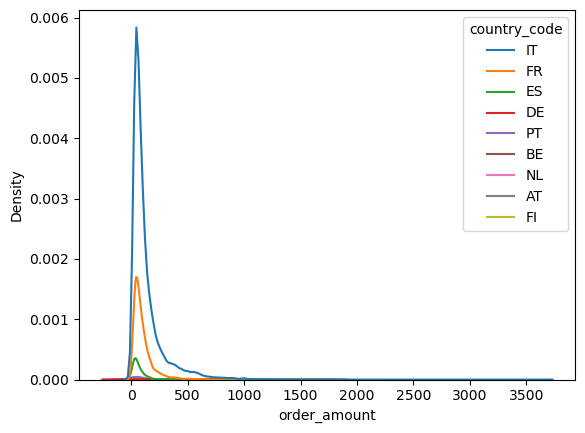

In [31]:


# media
#df_credit_v2.groupby('country_code')['order_amount'].hist()
sns.kdeplot(data=df_credit_v2, x='order_amount', hue='country_code')

In [32]:
# Placing the order location ratio
# Median behavior amount per country / order_amount per user
# FLAGEAR EL IMPORTE DE CADA USUARIO POR LA MEDIA DEL PAIS 
# Flag the order_amount of each user by the countries median
# A guy may purchase abpove the median
df_aux = df_credit_v2.groupby('country_code')['order_amount'].median()
df_aux_f = df_fraud_v2.groupby('country_code')['order_amount'].median() # COMPORATAMIENTO NORMAL POR PAIS
df_credit_v2['ratio_order_amount_per_country'] = df_credit_v2.apply(lambda r: r.order_amount / df_aux[r.country_code], axis=1) 
df_fraud_v2['ratio_order_amount_per_country'] = df_fraud_v2.apply(lambda r: r.order_amount / df_aux_f[r.country_code], axis=1) 


<AxesSubplot: xlabel='ratio_order_amount_per_country', ylabel='Density'>

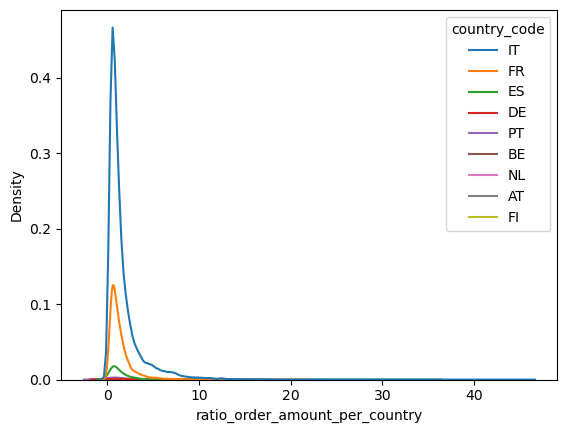

In [116]:
sns.kdeplot(data=df_credit_v2, x='ratio_order_amount_per_country', hue='country_code')

In [ ]:
# Location ratio order_amount
#df_aux_city = df_credit_v2.groupby('city')['order_amount'].median()
#df_aux_city_f = df_fraud_v2.groupby('city')['order_amount'].median() # COMPORATAMIENTO NORMAL POR PAIS
#df_credit_v2['ratio_order_amount_per_city'] = df_credit_v2.apply(lambda r: r.order_amount / df_aux_city[r.city], axis=1) 
#df_fraud_v2['ratio_order_amount_per_city'] = df_fraud_v2.apply(lambda r: r.order_amount / df_aux_city_f[r.city], axis=1) 

In [ ]:
# Shipmment ratio order_amount
#df_aux_ship = df_credit_v2.groupby('shipping_country')['order_amount'].median()
#df_aux_ship_f = df_fraud_v2.groupby('shipping_country')['order_amount'].median() # COMPORATAMIENTO NORMAL POR PAIS
#df_credit_v2['ratio_order_amount_per_shipping_country'] = df_credit_v2.apply(lambda r: r.order_amount / df_aux_ship[r.shipping_country], axis=1) 
#df_fraud_v2['ratio_order_amount_per_shipping_country'] = df_fraud_v2.apply(lambda r: r.order_amount / df_aux_ship_f[r.shipping_country], axis=1) 

In [33]:
# How many times was a unique id device used accross multiple accounts?
df_credit_v2['user_count_per_device'] = df_credit_v2.groupby('deviceid')['user_token'].transform('count')
df_fraud_v2['user_count_per_device'] = df_fraud_v2.groupby('deviceid')['user_token'].transform('count')

In [155]:
#df_credit_v2.head(1).T
toy_credit = df_credit_v2

In [156]:
toy_credit.sort_values()


,country_code,number_complete_orders,order_created_at,order_amount,funding,merchant_id,postcode_mapped,shipping_country,user_tenure_days,user_age,...,credit_loss_target,ratio_order_amount_per_country,user_count_per_device,holiday,is_holiday,order_created_at_month,order_created_at_weekday,time_difference_current_order,is_weekend,is_outlier_number_complete_orders
0,IT,3,2022-02-11 09:46:48+00:00,59.13,prepaid,1557,2999203,IT,430,27.0,...,False,0.738848,1,no_holiday,False,2,4,68.0,0,False
1,FR,0,2022-05-20 05:45:25+00:00,157.15,debit,2597,2210637,FR,2,33.0,...,False,2.133741,1,no_holiday,False,5,4,-226512.0,0,False
2,IT,0,2022-03-26 09:50:11+00:00,66.30,prepaid,2597,2996325,IT,0,22.0,...,False,0.828439,1,no_holiday,False,3,5,-258.0,1,False
3,FR,0,2021-12-01 17:45:52+00:00,62.10,debit,2433,3018019,FR,0,42.0,...,False,0.843177,10,no_holiday,False,12,2,68.0,0,False
5,IT,6,2022-02-14 09:04:16+00:00,949.20,prepaid,581,2314347,IT,258,44.0,...,False,11.860552,1,no_holiday,False,2,0,43.0,0,False


<AxesSubplot: xlabel='user_count_per_device', ylabel='Density'>

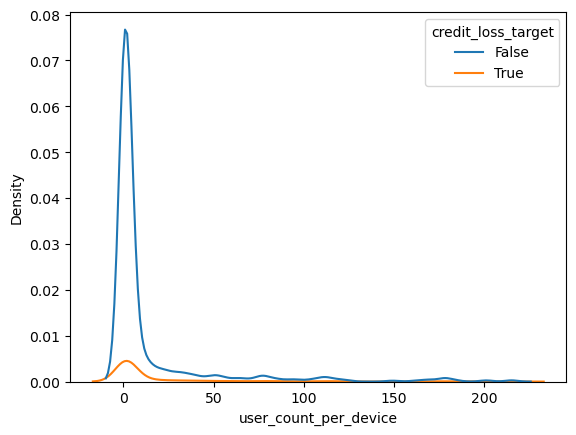

In [118]:
sns.kdeplot(data=df_credit_v2, x='user_count_per_device', hue='credit_loss_target')

In [34]:
# holidays
from datetime import datetime
import holidays


# Create a dictionary with the country codes and their corresponding holiday module
holidays_by_country = {'IT': holidays.Italy(), 'FR': holidays.France(), 'ES': holidays.Spain(),
                      'DE': holidays.Germany(), 'PT': holidays.Portugal(), 'BE': holidays.Belgium(),
                      'NL': holidays.Netherlands(), 'AT': holidays.Austria(), 'FI': holidays.Finland()}

# Function to get the holiday given the order_created_at and country_code
def get_holiday(order_created_at, country_code):
    date = order_created_at.date()
    holiday_name = holidays_by_country[country_code].get(date)
    if holiday_name:
        return holiday_name
    else:
        return 'no_holiday'


# Example usage
df_credit_v2['holiday'] = df_credit_v2.apply(lambda x: get_holiday(x['order_created_at'], x['country_code']), axis=1)
df_fraud_v2['holiday'] = df_fraud_v2.apply(lambda x: get_holiday(x['order_created_at'], x['country_code']), axis=1)




In [35]:
# create boolean variable is_holiday
df_credit_v2['is_holiday'] = df_credit_v2['holiday'] != 'no_holiday'
df_fraud_v2['is_holiday'] = df_fraud_v2['holiday'] != 'no_holiday'

In [36]:
# datetime features
df_credit_v2['order_created_at_month'] = df_credit_v2['order_created_at'].dt.month
df_credit_v2['order_created_at_weekday'] = df_credit_v2['order_created_at'].dt.weekday

# Creating new feature with difference between current_time_tz and order_created_at
df_credit_v2['time_difference_current_order'] = (df_credit_v2['current_time_tz'] - df_credit_v2['order_created_at']).dt.total_seconds()
df_credit_v2['is_weekend'] = df_credit_v2['order_created_at'].dt.dayofweek.isin([5, 6]).astype(int)

#Fraud
df_fraud_v2['order_created_at_month'] = df_fraud_v2['order_created_at'].dt.month
df_fraud_v2['order_created_at_weekday'] = df_fraud_v2['order_created_at'].dt.weekday

# Creating new feature with difference between current_time_tz and order_created_at
df_fraud_v2['time_difference_current_order'] = (df_fraud_v2['current_time_tz'] - df_fraud_v2['order_created_at']).dt.total_seconds()
df_fraud_v2['is_weekend'] = df_fraud_v2['order_created_at'].dt.dayofweek.isin([5, 6]).astype(int)

In [37]:
df_fraud_v2['flag_country'] = df_fraud_v2.country_code != df_fraud_v2.shipping_country
#df_fraud_v2['flag_country'] = df_fraud_v2.country_code != df_fraud_v2.shipping_country
#df_fraud["flag_fraud_datetime"] = df_fraud.apply(lambda x: True if x["order_created_at"] < x["current_time_tz"] else False, axis=1)


<AxesSubplot: xlabel='user_tenure_days', ylabel='Density'>

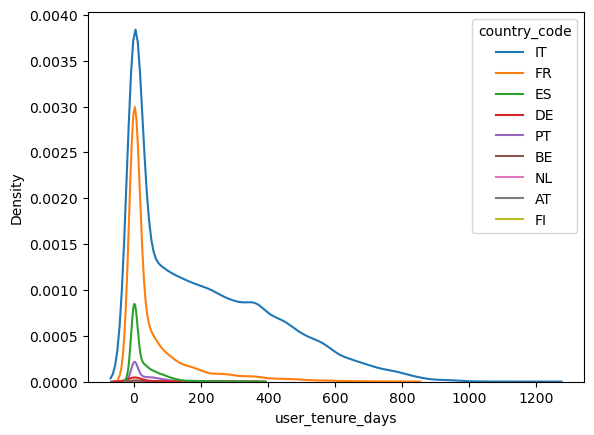

In [38]:
sns.kdeplot(data=df_credit_v2, x='user_tenure_days', hue='country_code')

In [ ]:
# order amount grouped user
#df_aux_tenure = df_credit_v2.groupby('country_code')['user_tenure_days'].median() # COMPORATAMIENTO NORMAL POR PAIS
#df_credit_v2['ratio_user_tenure_per_country_code'] = df_credit_v2.apply(lambda r: r.user_tenure_days / df_aux_tenure[r.country_code], axis=1)

#df_aux_tenure_f = df_fraud_v2.groupby('country_code')['user_tenure_days'].median() # COMPORATAMIENTO NORMAL POR PAIS
#df_fraud_v2['ratio_user_tenure_per_country_code'] = df_fraud_v2.apply(lambda r: r.user_tenure_days / df_aux_tenure_f[r.country_code], axis=1)

In [ ]:
#sns.scatterplot(df_fraud_v2.ratio_order_amount_per_country, df_fraud_v2.ratio_order_amount_per_city)
#plt.figure(figsize=(18,18))
#sns.heatmap(df_fraud_v2.corr(numeric_only=True), cmap="YlGnBu", annot=True)
#df_fraud_v2 = df_fraud_v2.drop(columns=['ratio_order_amount_per_shipping_country','ratio_order_amount_per_city'])
#df_credit_v2 = df_credit_v2.drop(columns=['ratio_order_amount_per_shipping_country','ratio_order_amount_per_city'])

<AxesSubplot: >

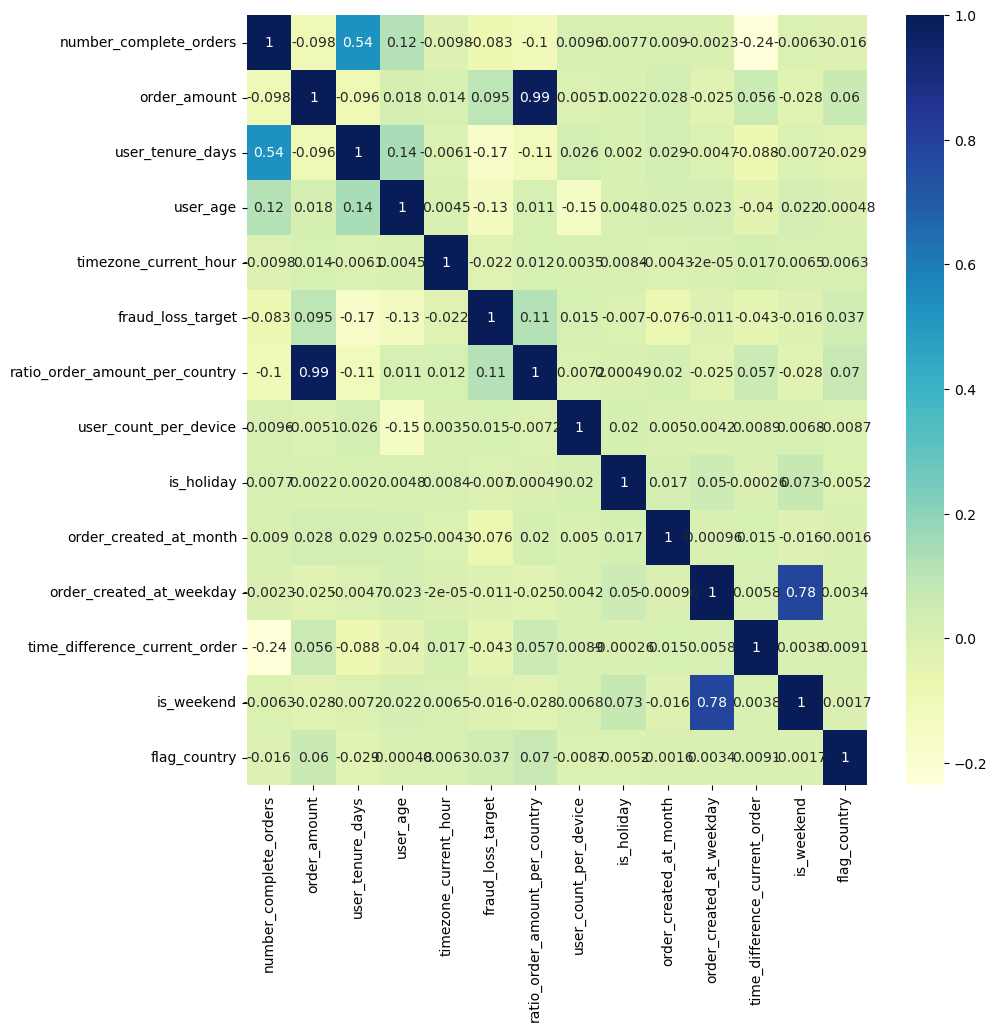

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df_fraud_v2.corr(numeric_only=True), cmap="YlGnBu", annot=True)

<AxesSubplot: >

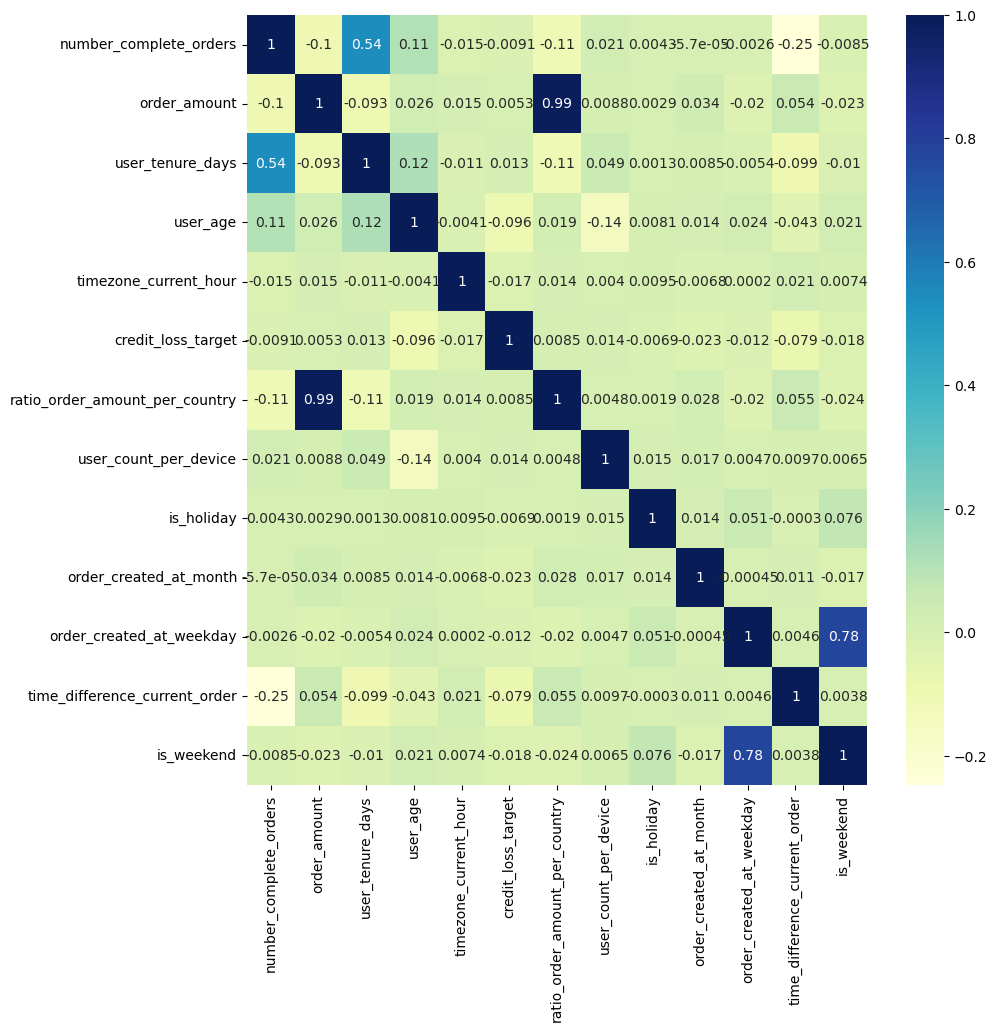

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df_credit_v2.corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [41]:
#outliers

df_fraud_v2['is_outlier_numer_complete_orders']= eda.detect_outliers_boxplot(df_fraud_v2, 'number_complete_orders')

-7.5
12.5


In [42]:
df_credit_v2['is_outlier_number_complete_orders']= eda.detect_outliers_boxplot(df_credit_v2, 'number_complete_orders')

-7.5
12.5


In [43]:
#Drop iDS
df_credit_v2 = df_credit_v2.drop(columns=['order_token', 'user_token'])
df_fraud_v2 = df_fraud_v2.drop(columns=['order_token', 'user_token'])

In [ ]:
#Fill missing values with cero
#df_credit_v2['ratio_user_tenure_per_country_code'] = df_credit_v2['ratio_user_tenure_per_country_code'].fillna(0)
#df_fraud_v2['ratio_user_tenure_per_country_code'] = df_fraud_v2['ratio_user_tenure_per_country_code'].fillna(0)

In [44]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt

def plot_mutual_info(data, target):
    # Step 1: Initialize an empty dictionary to store the mutual information scores
    mi_scores = {}

    # Step 2: Iterate through each column in the dataframe
    for col in data.columns:
        # Step 3: Check if the column is categorical and not the target variable
        if data[col].dtype == 'object' and col != target:
            # Step 4: Calculate the mutual information score between the column and the target variable
            mi = mutual_info_score(data[col], data[target])
            # Step 5: Add the mutual information score to the dictionary
            mi_scores[col] = mi
    # Step 6: Sort the dictionary by value in descending order
    mi_scores = dict(sorted(mi_scores.items(), key=lambda item: item[1], reverse=True))
    # Step 7: Plot the mutual information scores as a bar chart
    plt.bar(mi_scores.keys(), mi_scores.values())
    plt.ylabel('Mutual Information Score')
    plt.xlabel('Categorical Variable')
    plt.xticks(rotation=90)
    plt.show()




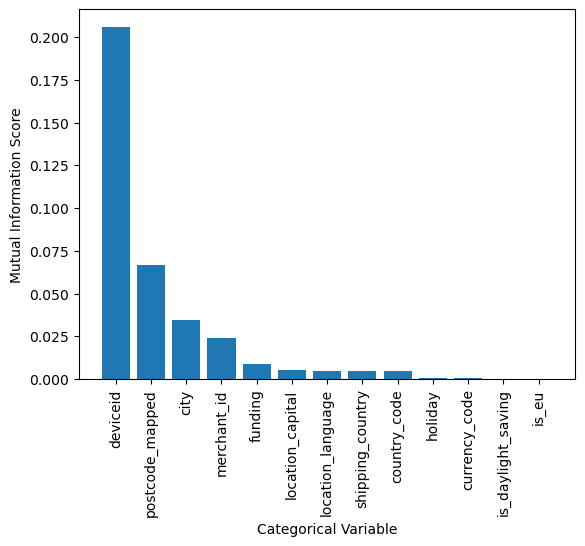

In [45]:

plot_mutual_info(df_credit_v2, 'credit_loss_target')

In [46]:
# Drop categorical values with low mutual info score

df_credit_model = df_credit_v2.drop(columns=['is_daylight_saving','currency_code', 'shipping_country', 'holiday', 'is_eu', 'location_capital'])

Text(0.5, 1.0, 'Correlated features after feature engineering  [credit_loss_target]')

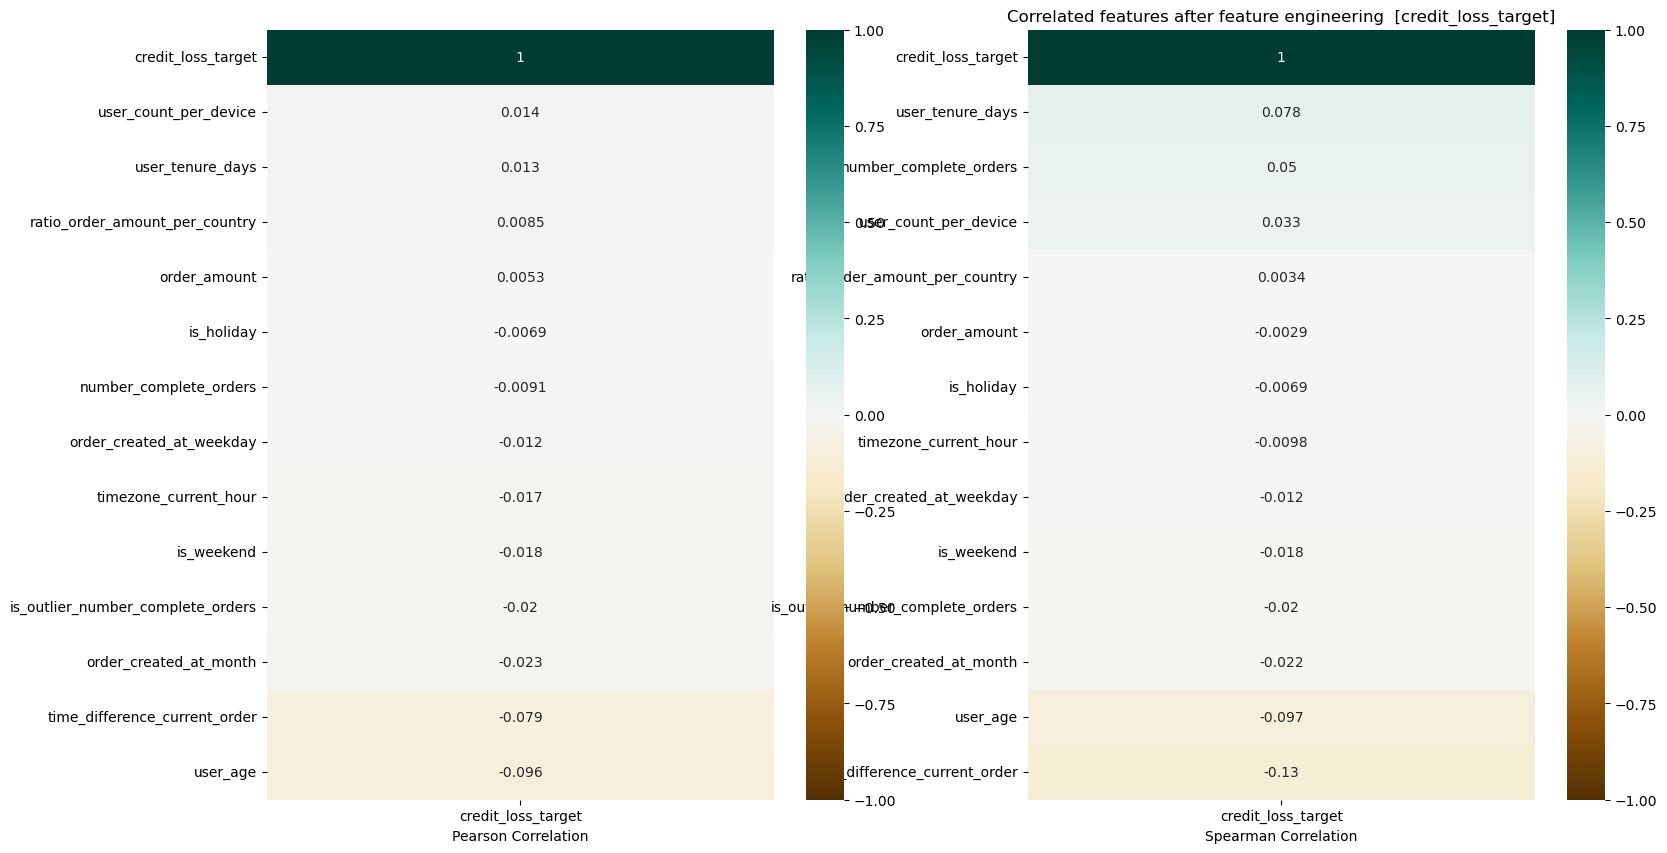

In [47]:
# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

sns.heatmap(df_credit_model.corr(numeric_only=True)[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)

sns.heatmap(df_credit_model.corr( numeric_only=True,method='spearman')[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)

ax1.set_xlabel('Pearson Correlation')

ax2.set_xlabel('Spearman Correlation')

plt.title('Correlated features after feature engineering  [credit_loss_target]', loc='center', )

In [48]:
# Start encoding
df_credit_model.describe(include=['object', 'category'])

,country_code,funding,merchant_id,postcode_mapped,city,location_language,deviceid
count,80120,80120,80120,80120,80120,80120,80120
unique,9,4,2156,10349,5321,29,53180
top,IT,debit,2597,nan,Milan,it,f00e33c378ef9c18abd5bc478bb0efe6
freq,60579,32801,14813,3218,13375,60324,215


In [49]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['merchant_id','city','location_language' ])
df_credit_model_encoded_1 = encoder.fit_transform(df_credit_model)


In [50]:
df_credit_model_encoded_1.describe(include='object')

,country_code,funding,postcode_mapped,deviceid
count,80120,80120,80120,80120
unique,9,4,10349,53180
top,IT,debit,nan,f00e33c378ef9c18abd5bc478bb0efe6
freq,60579,32801,3218,215


In [51]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['deviceid', 'postcode_mapped'])
df_credit_model_encoded_2 = encoder.fit_transform(df_credit_model_encoded_1, df_credit_model_encoded_1['credit_loss_target'])


In [52]:
df_credit_model_encoded_2.describe(include=['object', 'category'])

,country_code,funding
count,80120,80120
unique,9,4
top,IT,debit
freq,60579,32801


In [53]:
df_credit_model_encoded_3 = pd.get_dummies(df_credit_model_encoded_2, columns=['country_code','funding'])

In [54]:
df_credit_model_encoded_3.describe(include='bool')

,credit_loss_target,is_holiday,is_outlier_number_complete_orders
count,80120,80120,80120
unique,2,2,2
top,False,False,False
freq,73037,77703,71349


In [55]:
df_credit_model_encoded_3['credit_loss_target'] = (df_credit_model_encoded_3['credit_loss_target'] * 1)
df_credit_model_encoded_3['is_holiday'] = (df_credit_model_encoded_3['is_holiday'] * 1)
df_credit_model_encoded_3['is_outlier_number_complete_orders'] = (df_credit_model_encoded_3['is_outlier_number_complete_orders'] * 1)

In [56]:
df_credit_model_train = df_credit_model_encoded_3.drop(columns= ['order_created_at', 'current_time_tz'])
#df_fraud_model_train = df_fraud_model_encoded_3.drop(columns= ['order_created_at', 'current_time_tz'])

Text(0.5, 1.0, 'Correlated features after feature engineering and encoding [credit_loss_target]')

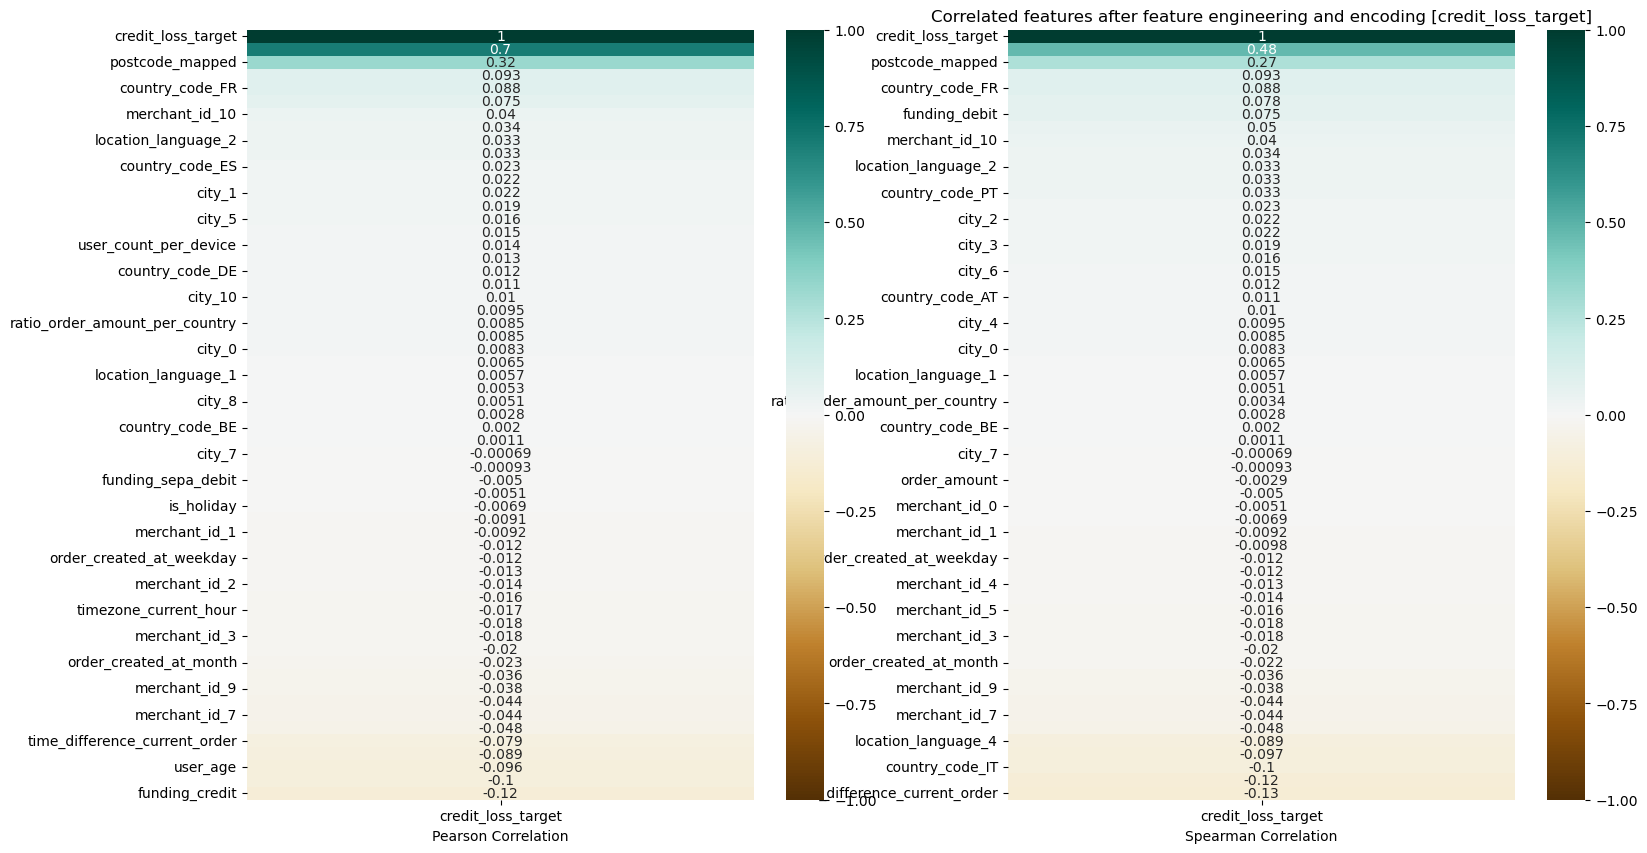

In [57]:
# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

sns.heatmap(df_credit_model_train.corr(numeric_only=True)[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)

sns.heatmap(df_credit_model_train.corr( numeric_only=True,method='spearman')[['credit_loss_target']].sort_values(by='credit_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)

ax1.set_xlabel('Pearson Correlation')

ax2.set_xlabel('Spearman Correlation')

plt.title('Correlated features after feature engineering and encoding [credit_loss_target]', loc='center', )

In [ ]:
# encoding Fraud

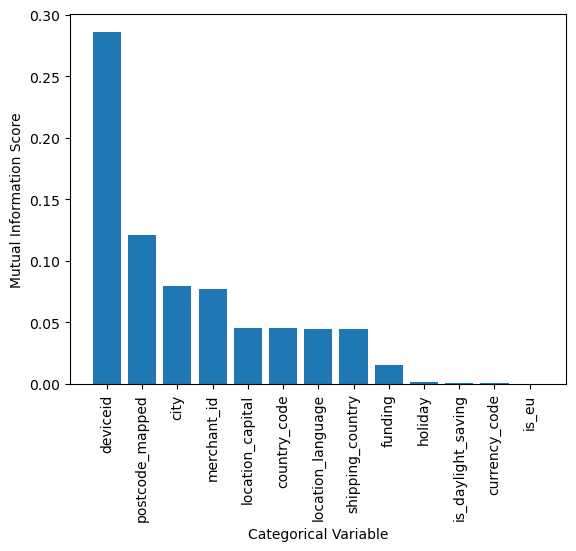

In [58]:
plot_mutual_info(df_fraud_v2, 'fraud_loss_target')

In [59]:
# Drop categorical values with low mutual info score

df_fraud_model = df_fraud_v2.drop(columns=['is_daylight_saving','currency_code', 'holiday', 'is_eu'])

Text(0.5, 1.0, 'Correlated features after feature engineering and encoding [fraud_loss_target]')

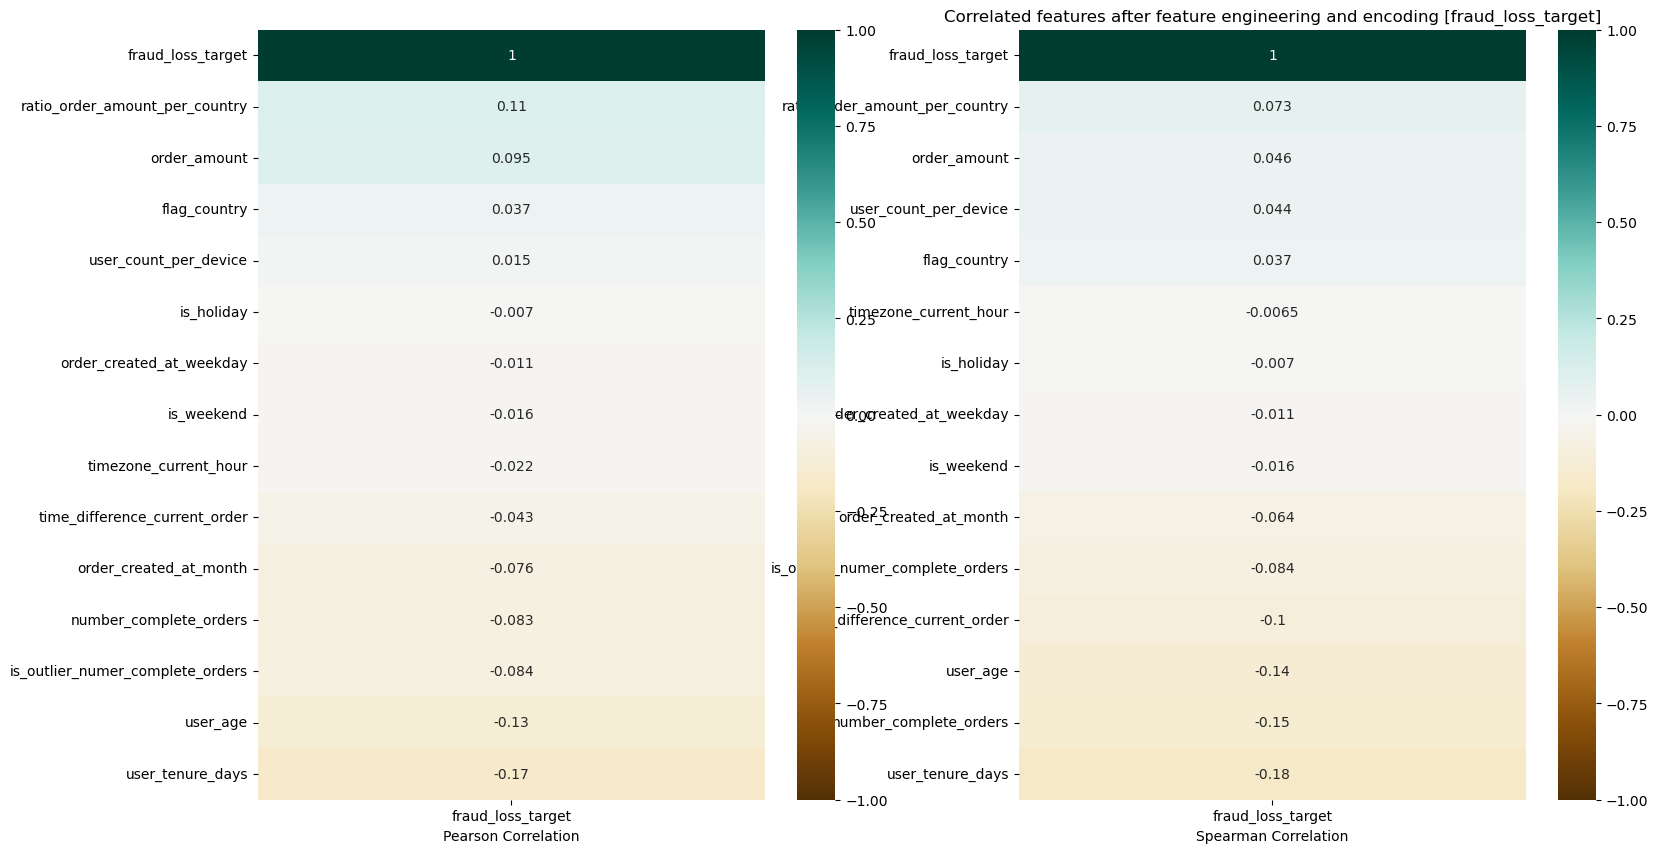

In [123]:
# Plot the proportions on separate bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

sns.heatmap(df_fraud_model.corr(numeric_only=True)[['fraud_loss_target']].sort_values(by='fraud_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)

sns.heatmap(df_fraud_model.corr( numeric_only=True,method='spearman')[['fraud_loss_target']].sort_values(by='fraud_loss_target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax2)

ax1.set_xlabel('Pearson Correlation')

ax2.set_xlabel('Spearman Correlation')

plt.title('Correlated features after feature engineering and encoding [fraud_loss_target]', loc='center', )

In [60]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['merchant_id','city','location_language','location_capital' ])
df_fraud_model_encoded_1 = encoder.fit_transform(df_fraud_model)

In [61]:
df_fraud_model_encoded_1.describe(include='object')

,country_code,funding,postcode_mapped,shipping_country,deviceid
count,92702,92702,92702,92702,92702
unique,9,4,11560,9,59824
top,IT,debit,nan,IT,20d646d2e43db182c88821a5dbd26cff
freq,64921,41013,3719,65113,260


In [62]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['deviceid', 'postcode_mapped'])
df_fraud_model_encoded_2 = encoder.fit_transform(df_fraud_model_encoded_1, df_fraud_model_encoded_1['fraud_loss_target'])

In [63]:
df_fraud_model_encoded_2.describe(include='object')

,country_code,funding,shipping_country
count,92702,92702,92702
unique,9,4,9
top,IT,debit,IT
freq,64921,41013,65113


In [64]:
df_fraud_model_encoded_3 = pd.get_dummies(df_fraud_model_encoded_2, columns=['country_code','funding', 'shipping_country'])

In [65]:
# boolean variables 
df_fraud_model_encoded_3.describe(include='bool')

,fraud_loss_target,is_holiday,flag_country,is_outlier_numer_complete_orders
count,92702,92702,92702,92702
unique,2,2,2,2
top,False,False,False,False
freq,80120,89949,92510,83481


In [66]:
df_fraud_model_encoded_3['fraud_loss_target'] = (df_fraud_model_encoded_3['fraud_loss_target'] * 1)
df_fraud_model_encoded_3['is_holiday'] = (df_fraud_model_encoded_3['is_holiday'] * 1)
df_fraud_model_encoded_3['is_outlier_numer_complete_orders'] = (df_fraud_model_encoded_3['is_outlier_numer_complete_orders'] * 1)
df_fraud_model_encoded_3['flag_country'] = (df_fraud_model_encoded_3['flag_country'] * 1)

In [67]:
#df_credit_model_train = df_credit_model_encoded_3.drop(columns= ['order_created_at', 'current_time_tz'])
df_fraud_model_train = df_fraud_model_encoded_3.drop(columns= ['order_created_at', 'current_time_tz'])

In [68]:
print(df_credit_model_train.shape)
print(df_fraud_model_train.shape)

(80120, 59)
(92702, 76)


In [73]:
df_credit_model_train = df_credit_model_train.dropna()
df_fraud_model_train = df_fraud_model_train.dropna()

In [69]:
# sanity check
import numpy as np

# Find NaN values
print('credit', np.isnan(df_credit_model_train).sum())
#print('fraud',np.isnan(df_fraud_model_train).sum())

# Find infinite values
print('credit infinite',np.isinf(df_credit_model_train).sum())
#print('fraud infinite',np.isinf(df_fraud_model_train).sum())

credit number_complete_orders               0
order_amount                         0
merchant_id_0                        0
merchant_id_1                        0
merchant_id_2                        0
merchant_id_3                        0
merchant_id_4                        0
merchant_id_5                        0
merchant_id_6                        0
merchant_id_7                        0
merchant_id_8                        0
merchant_id_9                        0
merchant_id_10                       0
merchant_id_11                       0
postcode_mapped                      0
user_tenure_days                     0
user_age                             1
city_0                               0
city_1                               0
city_2                               0
city_3                               0
city_4                               0
city_5                               0
city_6                               0
city_7                               0
city_8            

## TRAIN

In [139]:
# Prepare dataset and target
target = df_fraud_model_train.pop('fraud_loss_target')

df_fraud_model_train['fraud_loss_target'] = target
X = df_fraud_model_train.iloc[:, :-1].values
y = df_fraud_model_train['fraud_loss_target'].values

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 



# Train test split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


X_train_sub, X_valid, y_train_sub, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train)


print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 64887 19467 27810


In [81]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
import numpy as np
import optuna

In [94]:
# Baseline 

from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
baseline = DecisionTreeClassifier()
baseline.fit(X_train, y_train)


    # Get predictions for training set
#y_train_pred = baseline.predict(X_train)
    # Get predictions for testing set
#y_test_pred = baseline.predict(X_test)


DecisionTreeClassifier()

In [147]:
import mlflow
#import mlflow.xgboost

def optimization_objective(trial, X_train, y_train, cv=5, model_type='XGBoost'):
    params =  {
            "n_estimators": trial.suggest_categorical("n_estimators", [30, 50, 100, 300]),
            "learning_rate": trial.suggest_categorical("learning_rate", [0.01]),
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
            "max_depth": trial.suggest_int("max_depth", 2, 5),
            "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
    }

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(cv_iterator.split(X_train, y_train)):
        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]

        if model_type == 'XGBoost':
            model = XGBClassifier(**params, random_state=123, use_label_encoder=False)
        elif model_type == 'RandomForest':
            model = RandomForestClassifier(**params, random_state=123)
        elif model_type == 'LGBM':
            model = lgbm.LGBMClassifier(**params, random_state=123)
        else:
            raise ValueError("Invalid model type specified. Please choose from 'XGBoost', 'RandomForest', or 'LGBM'.")

        #model.fit(X_train_sub, y_train_sub, verbose=False)
        #mlflow.sklearn.autolog()
        model.fit(
            X_train_sub,
            y_train_sub,
            verbose=False,
            eval_set=[(X_valid, y_valid)],
            eval_metric=["auc", "logloss"],
            early_stopping_rounds=5,
            
        )

        preds = model.predict_proba(X_valid)[:,1]
        cv_scores[idx] = roc_auc_score(y_valid, preds)


    return  np.mean(cv_scores)






In [148]:
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier - Fraud")

def func(trial):
    return optimization_objective(trial, X_train, y_train)

[I 2023-01-31 11:30:58,261] A new study created in memory with name: XGBoost Classifier - Fraud


In [149]:
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score,
roc_auc_score,  recall_score, precision_score)
import mlflow
import mlflow.sklearn
with mlflow.start_run() as run:
# Log the model name
    mlflow.log_param("model_name", "XGBoost Classifier - Fraud")
    # log input sizes
    mlflow.log_param("train_size", len(y_train))
    mlflow.log_param("test_size", len(y_test))
    mlflow.log_param("valid_size", len(y_valid))

    # Log the parameters used in the model
    #mlflow.log_params(params)
    study.optimize(func, n_trials=5)
    # Get the best trial
    best_trial = study.best_trial
    # Log the best trial's objective value
    mlflow.log_metric("best_trial_objective_value", best_trial.value)
    # Log the best trial's hyperparameters
    mlflow.log_params(best_trial.params)
    # Train the final model on the entire training set using the best trial's hyperparameters
    model_final = XGBClassifier(**best_trial.params, random_state=123, use_label_encoder=False)
    model_final.fit(X_train, y_train)

    # Get predictions for training set
    y_train_pred = model_final.predict(X_train)
    # Get predictions for testing set
    y_test_pred = model_final.predict(X_test)

    # Precision
    train_p = precision_score(y_train, y_train_pred)
    test_p = precision_score(y_test, y_test_pred)
    mlflow.log_metric("train_precision", train_p)
    mlflow.log_metric("test_precision", test_p)

    # Recall
    train_r = recall_score(y_train, y_train_pred)
    test_r = recall_score(y_test, y_test_pred)
    mlflow.log_metric("train_recall", train_r)
    mlflow.log_metric("test_recall", test_r)

    # F1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    mlflow.log_metric("train_f1", train_f1)
    mlflow.log_metric("test_f1", test_f1)

    #fbeta
    train_fbeta = fbeta_score(y_train, y_train_pred, beta=2)
    test_fbeta = fbeta_score(y_test, y_test_pred, beta=2)
    mlflow.log_metric("train_fbeta", train_fbeta)
    mlflow.log_metric("test_fbeta", test_fbeta)

    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    mlflow.log_metric("train_roc_auc", train_roc_auc)
    mlflow.log_metric("test_roc_auc", test_roc_auc)

    # get the feature importances
    importances = baseline.feature_importances_

    # create a dataframe of feature importances
    feature_importances = pd.DataFrame({'feature': df_fraud_model_train.iloc[:, :-1].columns, 'importance': importances})

    # sort the dataframe by feature importance
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    # Log the feature importances as an artifact
    mlflow.log_artifact("feature_importances.csv")
    # Log the final model
    mlflow.sklearn.log_model(model_final, "model")
    

/var/folders/dc/19g8x7m956bdv97zjz8skp8r0000gp/T/ipykernel_81790/2818498712.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/var/folders/dc/19g8x7m956bdv97zjz8skp8r0000gp/T/ipykernel_81790/2818498712.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/var/folders/dc/19g8x7m956bdv97zjz8skp8r0000gp/T/ipykernel_81790/2818498712.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_fl

AttributeError: module 'mlflow.sklearn' has no attribute 'autolog'

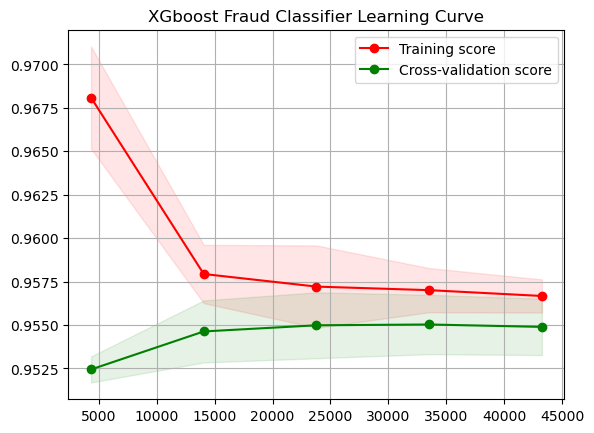

In [104]:
from sklearn.model_selection import learning_curve

best_model_learning_curve = XGBClassifier(**study.best_params, random_state=123, eval_metric = 'logloss', use_label_encoder=False)

train_sizes, train_scores, test_scores = learning_curve(best_model_learning_curve, X_train, y_train, cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("XGboost Fraud Classifier Learning Curve")
#plt.xlabel("Training examples")
#plt.ylabel("AUC Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


/Users/admin/miniconda3/envs/frozen/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


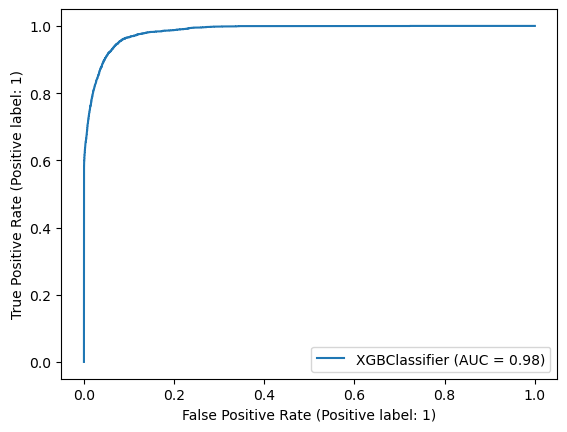

In [153]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_final, X_test, y_test)

In [107]:
sum(y_train == 0) / sum(y_train == 1) # imbalance ratio

6.370172648796002

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier



# Define the range of values for the parameter you want to plot the curve for
param_range = [1, 2, 3, 4, 5, 6, 7, 8]

# Define the metric to use for the curve
#scoring = make_scorer(fbeta_score, beta=2)
best_model_validation_curve = XGBClassifier(**study.best_params, random_state=123, eval_metric = 'error', use_label_encoder=False)

# Compute the curve
train_scores, test_scores = validation_curve(best_model_validation_curve, X_train, y_train, param_name="max_depth", param_range=param_range,
                                             cv=5, scoring='roc_auc')

# Plot the curve
plt.plot(param_range, train_scores.mean(axis=1), label='Training score')
plt.plot(param_range, test_scores.mean(axis=1), label='Cross-validation score')
plt.legend(loc='best')
plt.xlabel('MAX_DEPTH')
plt.ylabel('ROC AUC')
plt.show()


In [ ]:
import pickle

# fit model on training data
#model = XGBClassifier()
#model.fit(X_train, y_train)

# save model to file
pickle.dump(model_final, open("xgb_model_credit_new_target.pkl", "wb"))

# load model from file
#loaded_model = pickle.load(open("xgb_model.pkl", "rb"))

# make predictions on new data
#y_pred = loaded_model.predict(X_test)


In [ ]:
plt.figure(figsize=(16, 15))
sns.barplot(data= feature_importances, x='importance', y='feature')

In [ ]:
plt.figure(figsize=(16, 15))
sns.barplot(data= feature_importances.head(10), x='importance', y='feature')

In [ ]:
optuna.visualization.plot_param_importances(study)

In [134]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier

# Load data and split into training and testing se
# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict class probabilities for the testing set
probs = clf.predict_proba(X_test)
preds = clf.predict(X_test)

# Obtain precision and recall values for different threshold values
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])

# Calculate average precision
average_precision = average_precision_score(y_test, probs[:,1])


# Implement reject inference by setting a threshold value to reject some predictions
threshold = 0.5
predictions = (probs[:,1] > threshold).astype(int)

# Calculate precision and recall of reject inference
reject_precision = precision_score(y_test, predictions)
precision_score = precision_score(y_test, preds)
reject_recall = recall_score(y_test, predictions)
recall_score = recall_score(y_test, preds)

# Print the results
print("Precision:", precision_score)
print("Recall:", recall_score)
print("Average Precision:", average_precision)
print("Reject Precision:", reject_precision)
print("Reject Recall:", reject_recall)



Precision: 0.8950655840099938
Recall: 0.7594064652888183
Average Precision: 0.9245601085328746
Reject Precision: 0.8950655840099938
Reject Recall: 0.7594064652888183


In [137]:
probs[:,1]

array([0.02, 0.79, 0.26, ..., 0.  , 0.42, 0.49])

In [136]:
preds

array([0, 1, 0, ..., 0, 0, 0])

In [131]:


# Set a threshold for the minimum confidence required to make a prediction
threshold = 0.9

# Get the index of examples where the model is confident
confident_idx = np.where(probs.max(axis=1) >= threshold)

# Make predictions only for confident examples
y_pred = clf.predict(X_test[confident_idx])

# Calculate accuracy for confident examples only
accuracy = accuracy_score(y_test[confident_idx], y_pred)
print("Accuracy with reject inference:", accuracy)

Accuracy with reject inference: 0.994593366651522


In [138]:
confident_idx

(array([    0,     1,     3, ..., 27804, 27805, 27807]),)

In [150]:
mlflow_runs= pd.read_csv('runs.csv')